First value in series :  266.0 145.9
Last value in series :  646.9
Length of series:  36
[history[i] for i in range(length-window,length)] [266.0, 145.90000000000001, 183.09999999999999, 119.3, 180.30000000000001, 168.5]
test_weight:  [ 0.5  0.6  0.7  0.8  0.9  1. ]
test_list:  [133.0, 87.540000000000006, 128.16999999999999, 95.439999999999998, 162.27000000000001, 168.5]
new mean:  129.153333333
predicted=177.183333, expected=231.800000
27.0
[history[i] for i in range(length-window,length)] [145.90000000000001, 183.09999999999999, 119.3, 180.30000000000001, 168.5, 231.80000000000001]
test_weight:  [ 0.5  0.6  0.7  0.8  0.9  1. ]
test_list:  [72.950000000000003, 109.86, 83.509999999999991, 144.24000000000001, 151.65000000000001, 231.80000000000001]
new mean:  132.335
predicted=171.483333, expected=224.500000
27.0
[history[i] for i in range(length-window,length)] [183.09999999999999, 119.3, 180.30000000000001, 168.5, 231.80000000000001, 224.5]
test_weight:  [ 0.5  0.6  0.7  0.8  0.9  1. 

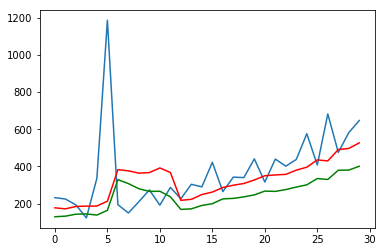

In [20]:
import numpy as np
import pandas as pd
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

coloumn_no = 1
df = pd.read_excel('C:\Users\lingaselvan\Documents\Python Scripts\Data\shampoo_data.xlsx')
series = []
for i in range(len(df)):
    series.append(df.iloc[i,coloumn_no])
print "First value in series : ", series[0], series[1]
print "Last value in series : ", series[len(df)-1]
print "Length of series: ", len(series)

# prepare situation
X = np.asarray(series)
window = 6

test_weight = np.linspace(0.5, 1.0, num=window)

history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

tmp_predict = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    print "[history[i] for i in range(length-window,length)]", [history[i] for i in range(length-window,length)]
    print "test_weight: ", test_weight
    test_list = [a*b for a,b in zip(test_weight,[history[i] for i in range(length-window,length)])]
    print "test_list: ", test_list
    yhat = mean([history[i] for i in range(length-window,length)])
    print "new mean: ", mean(test_list)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    tmp_predict.append(mean(test_list))
    print('predicted=%f, expected=%f' % (yhat, obs))
    print round((abs(yhat - obs)*100)/(abs(yhat + obs)/2))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.plot(tmp_predict, color='green')
pyplot.show()

# zoom plot
#pyplot.plot(test[0:100])
#pyplot.plot(predictions[0:100], color='red')
#pyplot.show()